In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = ('https://coinmarketcap.com/')

In [13]:
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1709184112539;return;}window.__renderTime__ = {"pageInitStart":1709184112463,"pageInitEnd":1709184112531,"pageRender":1709184112539};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE_ERROR__) r
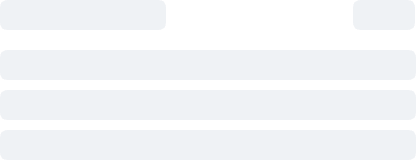

In [14]:
soup

In [15]:
table = soup.find_all('table')[0]
table

<table class="sc-14cb040a-3 dsflYb cmc-table"><colgroup><col/><col style="width:50px;min-width:auto;max-width:auto"/><col style="width:250px;min-width:auto;max-width:auto"/><col/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col/></colgroup><thead><tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-3729ca77-0 iGEoyd sortable-header-container"><div class="sc-3729ca77-1 bxjZzL"><p class="sc-4984dd93-0 fiHcNM rank-column-title" color="text" data-sensors-click="true" font-size="0">#</p><span class="sc-3729ca77-2 bdkjWA icon-wrapper"></span></div></div></th><th class="stickyTop" style="text-align:start"><div class="sc-3729ca77-0 iGEoyd sortable-header-container"><div 

In [31]:
table_titles = table.find_all('th')
table_titles

[<th class="stickyTop"></th>,
 <th class="stickyTop" style="text-align:start"><div class="sc-3729ca77-0 iGEoyd sortable-header-container"><div class="sc-3729ca77-1 bxjZzL"><p class="sc-4984dd93-0 fiHcNM rank-column-title" color="text" data-sensors-click="true" font-size="0">#</p><span class="sc-3729ca77-2 bdkjWA icon-wrapper"></span></div></div></th>,
 <th class="stickyTop" style="text-align:start"><div class="sc-3729ca77-0 iGEoyd sortable-header-container"><div class="sc-3729ca77-1 bxjZzL"><p class="sc-4984dd93-0 fiHcNM" color="text" data-sensors-click="true" font-size="0">Name</p><span class="sc-3729ca77-2 bdkjWA icon-wrapper"></span></div></div></th>,
 <th class="stickyTop" style="text-align:end"><div class="sc-3729ca77-0 kQqBXi sortable-header-container"><div class="sc-3729ca77-1 bxjZzL"><span class="sc-3729ca77-2 bdkjWA icon-wrapper"></span><p class="sc-4984dd93-0 fiHcNM" color="text" data-sensors-click="true" font-size="0">Price</p></div></div></th>,
 <th class="stickyTop" style=

In [77]:
table_title = [title.text for title in table_titles[2:-1]]
table_title




['Name',
 'Price',
 '1h %',
 '24h %',
 '7d %',
 'Market Cap',
 'Volume(24h)',
 'Circulating Supply']

In [21]:
import pandas as pd

In [78]:
df = pd.DataFrame(columns=table_title)
df

,Name,Price,1h %,24h %,7d %,Market Cap,Volume(24h),Circulating Supply


In [64]:
column_data = table.find_all('tr')
column_data

[<tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-3729ca77-0 iGEoyd sortable-header-container"><div class="sc-3729ca77-1 bxjZzL"><p class="sc-4984dd93-0 fiHcNM rank-column-title" color="text" data-sensors-click="true" font-size="0">#</p><span class="sc-3729ca77-2 bdkjWA icon-wrapper"></span></div></div></th><th class="stickyTop" style="text-align:start"><div class="sc-3729ca77-0 iGEoyd sortable-header-container"><div class="sc-3729ca77-1 bxjZzL"><p class="sc-4984dd93-0 fiHcNM" color="text" data-sensors-click="true" font-size="0">Name</p><span class="sc-3729ca77-2 bdkjWA icon-wrapper"></span></div></div></th><th class="stickyTop" style="text-align:end"><div class="sc-3729ca77-0 kQqBXi sortable-header-container"><div class="sc-3729ca77-1 bxjZzL"><span class="sc-3729ca77-2 bdkjWA icon-wrapper"></span><p class="sc-4984dd93-0 fiHcNM" color="text" data-sensors-click="true" font-size="0">Price</p></div></div></th><th class="stickyTop" style="text-al

In [90]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    row_data = [data.text for data in row_data[2:-1]]
    # if 'WorldCoin' in row_data:
    print(row_data)



['BitcoinBTC', '$61,857.81', '0.29%', '8.13%', '20.04%', '$1.22T$1,216,685,156,042', '$90,659,890,0011,463,493 BTC', '19,640,556 BTC']
['EthereumETH', '$3,432.14', '0.26%', '5.33%', '16.94%', '$412.68B$412,680,488,455', '$36,916,202,48610,747,720 ETH', '120,147,088 ETH']
['Tether USDtUSDT', '$1.00', '0.03%', '0.05%', '0.03%', '$98.71B$98,713,680,943', '$140,920,333,577140,912,809,023 USDT', '98,708,410,047 USDT']
['BNBBNB', '$414.78', '0.53%', '4.23%', '10.07%', '$62.03B$62,027,471,835', '$2,562,554,2216,178,082 BNB', '149,542,508 BNB']
['SolanaSOL', '$123.15', '0.49%', '13.19%', '18.77%', '$54.5B$54,500,499,394', '$6,328,363,66051,387,328 SOL', '442,552,796 SOL']
['XRPXRP', '$0.5928', '1.34%', '1.87%', '9.58%', '$32.37B$32,365,950,992', '$3,388,000,8285,714,812,932 XRP', '54,594,247,369 XRP']
['USDCUSDC', '$0.9999', '0.00%', '0.01%', '0.01%', '$28.66B$28,656,286,989', '$12,931,016,76612,932,921,518 USDC', '28,660,508,091 USDC']
['CardanoADA', '$0.6575', '1.97%', '5.69%', '12.50%', '$2

In [94]:
worldcoin_row = df[df['Name'] == 'WorldCoin WLD']
print(worldcoin_row)

Empty DataFrame
Columns: [Name, Price, 1h %, 24h %, 7d %, Market Cap, Volume(24h), Circulating Supply]
Index: []
